<a href="https://colab.research.google.com/github/ncat-morrow/isen-project-1-370-project/blob/main/ISEN_370_Project_2_Demo_AW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Project 2 Demonstration
In this demo, you will be shown how to use data science tools to conduct a hypothesis testing for a given dataset. <br>
The next section provides some tips that can be used in this Markdown document.


# Markdown can work with Latex to type math symbols and formulas.
* You can put formulas centered in their own lines using double \$\$ characters. <br>
* Greek letter MU is represented by \mu <br>
* subscription is done using "_" <br>
* not equal to is represented by \neq <br>
* Use \<br> for a new line

# Import Libraries
We will need to import necessary libraries for the project.
*  Numpy is The fundamental package for scientific computing with Python.
*  Pandas is a data analysis and manipulation tool.  
*  Matplotlib is Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
*  SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.








In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

## Data Import

The Learning Enhanced Watershed Assessment System (LEWAS) is a unique real-time water and weather monitoring system. The LEWAS monitoring site is installed at the outfall of the Webb Branch watershed on Virginia Tech’s campus. Webb Branch is an urban stream with a 2.78 square kilometer (about one square mile) watershed consisting of residential and commercial properties. The stream is routed through man-made channels and culverts until it discharges at the LEWAS monitoring site.<br>
More information about LEWAS Project can be found at:
http://www.lewas.ictas.vt.edu/
In this example, we will use a small subset of LEWAS data. <br>
We first import the LEWAS datasets and print the first 10 rows of data. The data is stored in CSV files on github site and the path is given in the cell below.
There are two CSV files, the first contains data from 9/28/16-9/30/16 and the second contains the same period a year later.

read.csv() is a function in pandas that allows us read csv file.
df.head() is a funciton that can be applied to a dataframe to display the first n number of records. So df1.head(10) will display first 10 records for dataframe df1.
More informartion about pandas.read.csv() can be seen at:
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html


In [3]:
data_url1='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_1.csv'
data_url2='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_2.csv'


In [4]:
df1=pd.read_csv(data_url1)
df1.head(10)

,Date and Time,Water Temperature (F),Estimated Flow Rate (m3/s)
0,9/28/16 1:00 PM,64.562,0.073
1,9/28/16 1:01 PM,64.544,0.072
2,9/28/16 1:02 PM,64.544,0.073
3,9/28/16 1:03 PM,64.562,0.073
4,9/28/16 1:04 PM,64.544,0.070
5,9/28/16 1:05 PM,64.544,0.072
6,9/28/16 1:06 PM,64.544,0.068
7,9/28/16 1:07 PM,64.544,0.071
8,9/28/16 1:08 PM,64.580,0.070
9,9/28/16 1:09 PM,64.562,0.070


In [5]:
df2=pd.read_csv(data_url2)
df2.head(10)

,Date and Time,Water Temperature (F),Est. Flow Rate[m^3/s]
0,9/28/17 12:00 AM,66.560,0.001469
1,9/28/17 12:03 AM,66.560,0.001471
2,9/28/17 12:06 AM,66.542,0.006522
3,9/28/17 12:09 AM,66.560,0.004293
4,9/28/17 12:12 AM,66.542,0.002252
5,9/28/17 12:15 AM,66.560,0.009034
6,9/28/17 12:18 AM,66.542,0.005067
7,9/28/17 12:21 AM,66.578,-0.001823
8,9/28/17 12:24 AM,66.542,-0.007261
9,9/28/17 12:27 AM,66.524,-0.011683


## Exploring Data

We can use a scatter plot to explore the data.<br>
The data includes two features: Water Temperature and Est. Flow Rate[m^3/s]. In this exercise, we will focus on water temperature.<br>
Generate two scatter plots: one for the data of water temperature in 2016 and the other for the data of water temperature in 2017.

matplotlib.pyplot provides MATLAB-like of plots. It has many functions. Function <b>figure([num, figsize, ...])</b> can be used to create a new figure, or activate an existing figure. num can be a unique identifier for the figure. If no num is provided, a new figure will be generated. figsize=(flot, float) provides the Width, height of the figure in inches. The default values are (6.4, 4.8).

scatter(x, y[, s,  ...]) can be used to generate a scatter plot of y vs x.  s Speficies the marker size in points and is optional. The default value for s is 2.

xlabel(xlabel) can be used to set the label for the x-axis.
ylable(ylabel) can  be used to set the label for the y axis.

show() is used to display the open figure.
More information about maptplotlib.pyplot.figure() can be seen at
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

More information about matplotlib.pyplot.scatter() can be seen at
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

To construct a scatter plot for temperature in 2016, we can use matplotlib.pyplot.figure() function and matplotlib.pyplot.scatter() fucntion. <br>
Use matplotlib.pyplot.title() and matplotlib.pyplot.xlabel(), matplotlib.pyplot.ylabel() to set the title and labels for the plot.

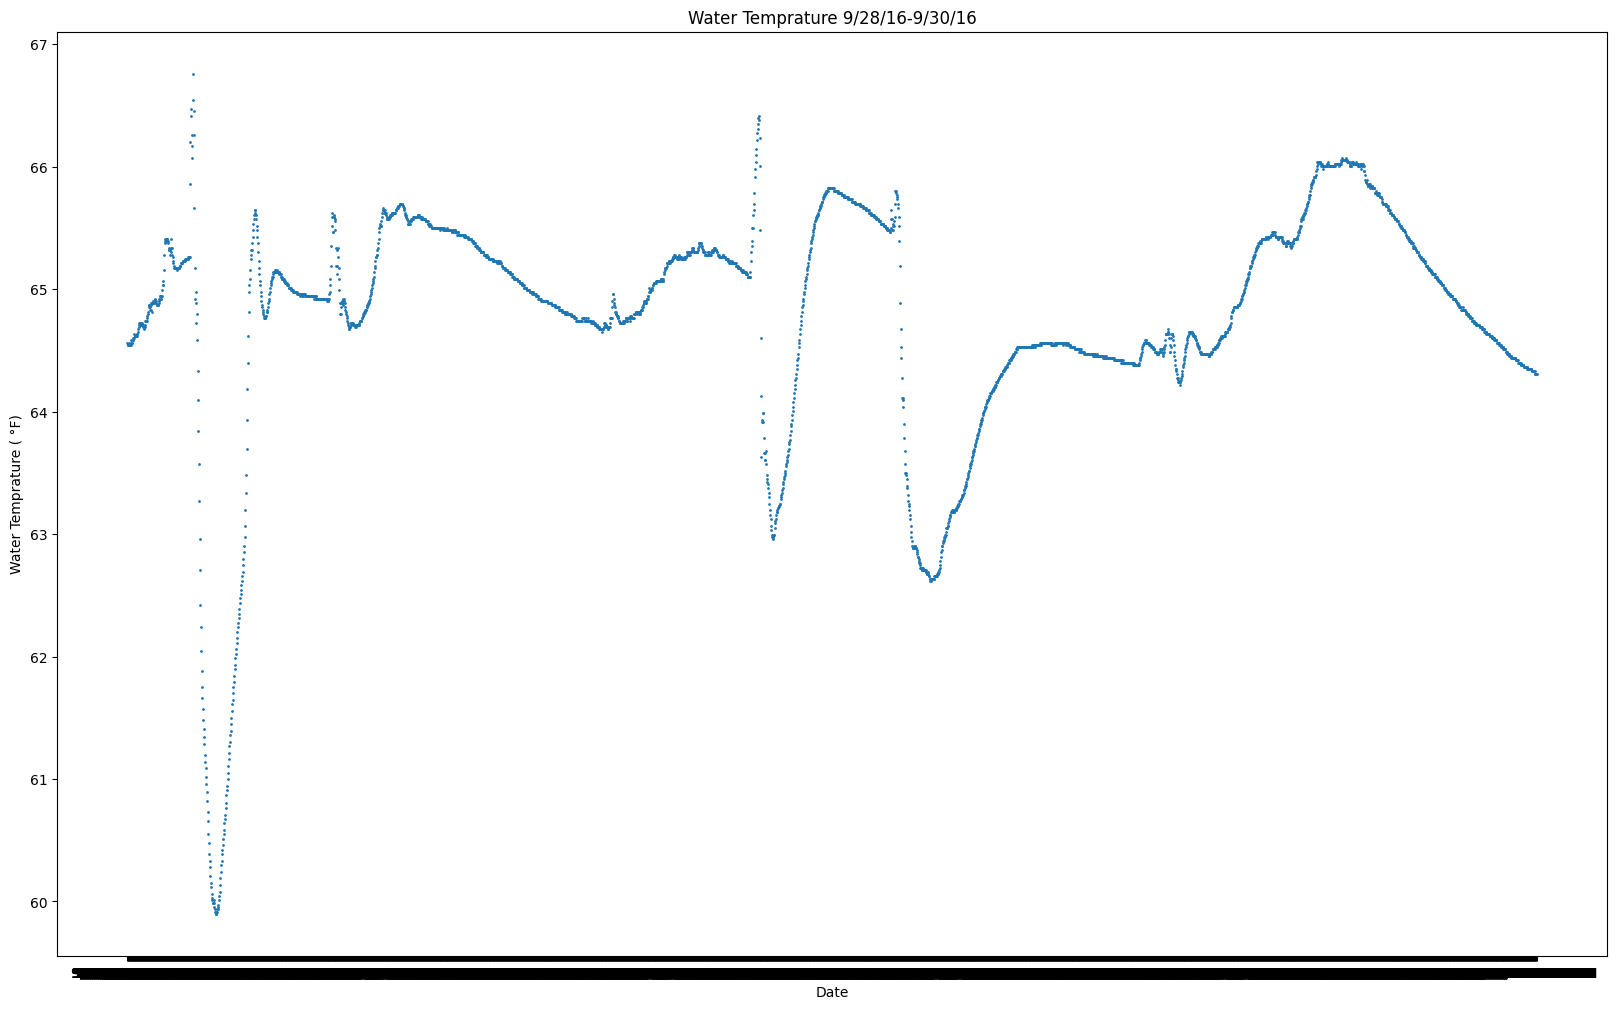

In [6]:
plt.figure(figsize=(20,12))
plt.scatter(df1["Date and Time"], df1["Water Temperature (F)"], s=1)
plt.title("Water Temprature 9/28/16-9/30/16")
plt.xlabel("Date")
plt.ylabel('Water Temprature ( \N{DEGREE SIGN}F)')
plt.show()

We could also generate a subset of data that is from a particular date, say 9/28/16.<br>
Generate a new dataframe named df12 that contains data from 9/28/16 and display the top ten observations.




In [7]:
df12=df1[df1['Date and Time'].astype(str).str[:7]=='9/28/16']
df12.head(10)

,Date and Time,Water Temperature (F),Estimated Flow Rate (m3/s)
0,9/28/16 1:00 PM,64.562,0.073
1,9/28/16 1:01 PM,64.544,0.072
2,9/28/16 1:02 PM,64.544,0.073
3,9/28/16 1:03 PM,64.562,0.073
4,9/28/16 1:04 PM,64.544,0.070
5,9/28/16 1:05 PM,64.544,0.072
6,9/28/16 1:06 PM,64.544,0.068
7,9/28/16 1:07 PM,64.544,0.071
8,9/28/16 1:08 PM,64.580,0.070
9,9/28/16 1:09 PM,64.562,0.070


Generate a scatter plot based on dataframe d2 that contains data from year 2017.

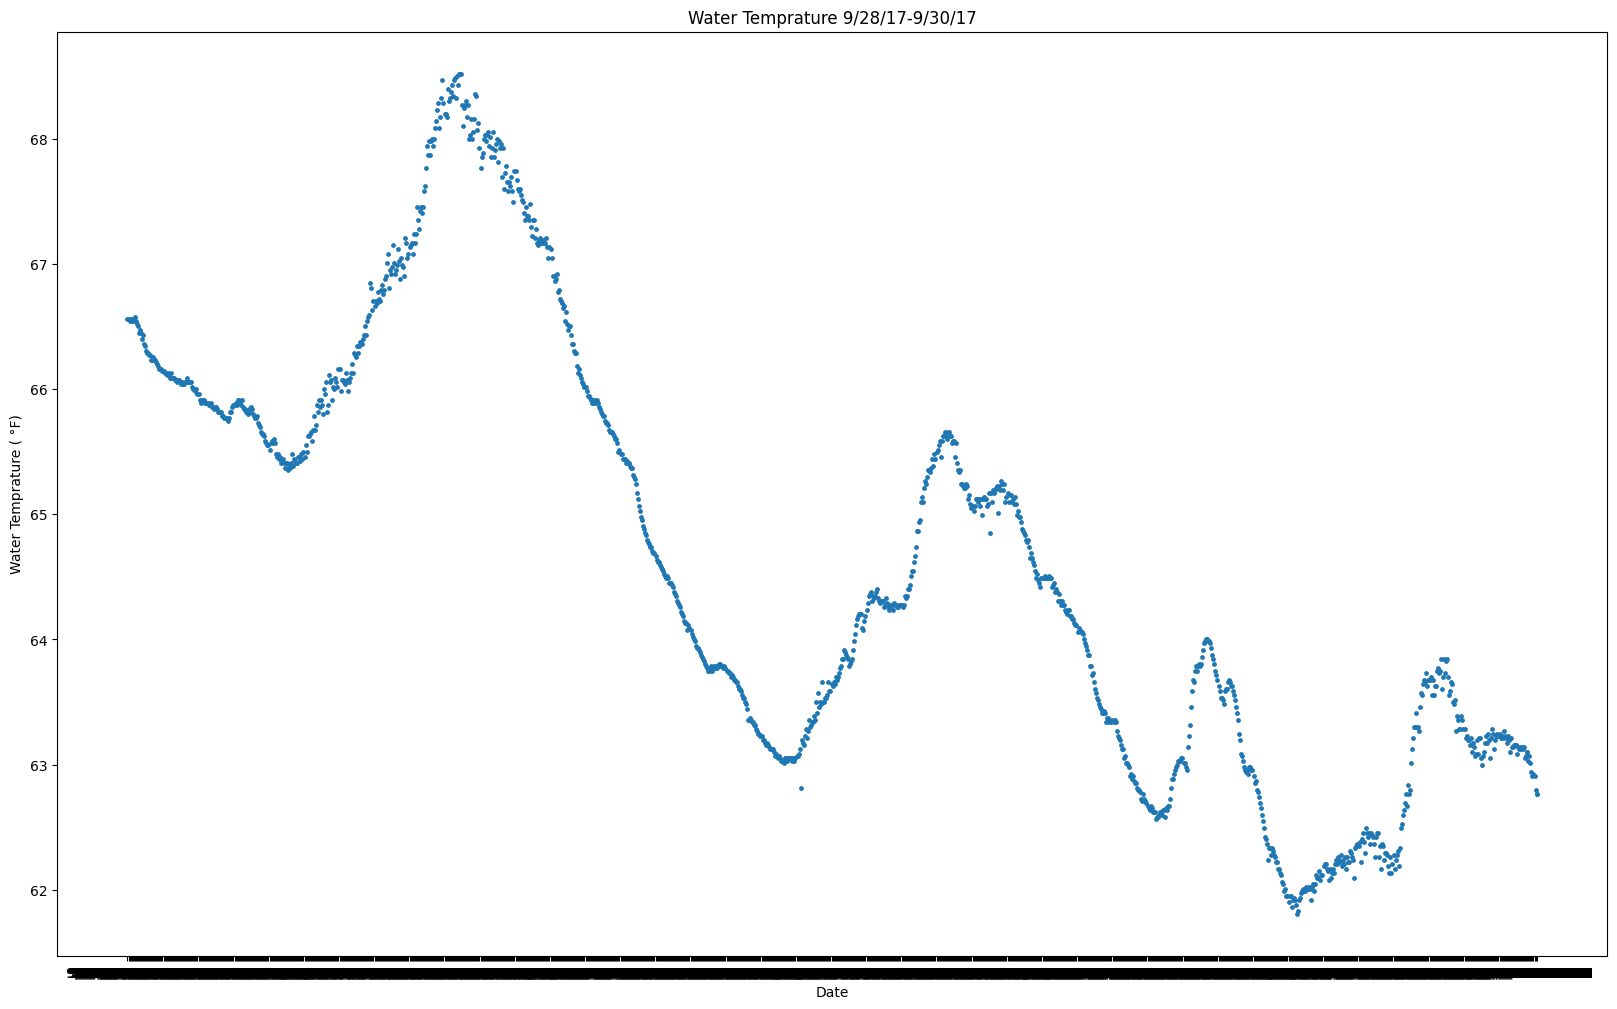

In [8]:
plt.figure(figsize=(20,12))
plt.scatter(df2["Date and Time"], df2["Water Temperature (F)"], s=6)
plt.title("Water Temprature 9/28/17-9/30/17")
plt.xlabel("Date")
plt.ylabel('Water Temprature ( \N{DEGREE SIGN}F)')
plt.show()

#Histogram
Histograms can be used to examine the ditribution of the data.
<br>
plt.hist(x) fuction can be used to generate the histogram for a selected variable.<br>
matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)<br>
This method uses numpy.histogram to bin the data in x and count the number of values in each bin, then draws the distribution either as a BarContainer or Polygon. The bins, range, density, and weights parameters are forwarded to numpy.histogram.<br>
More information about plt.hist() can be seen at:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


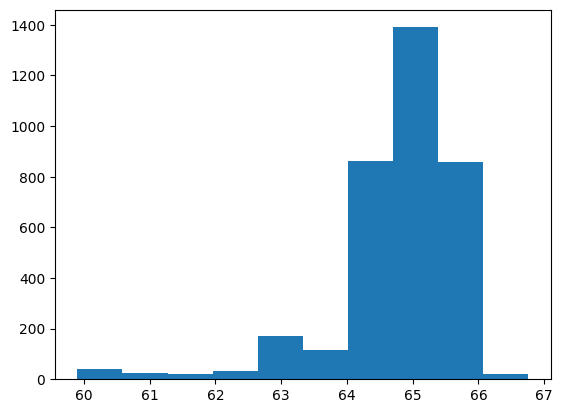

In [9]:
plt.hist(df1["Water Temperature (F)"])
plt.show()

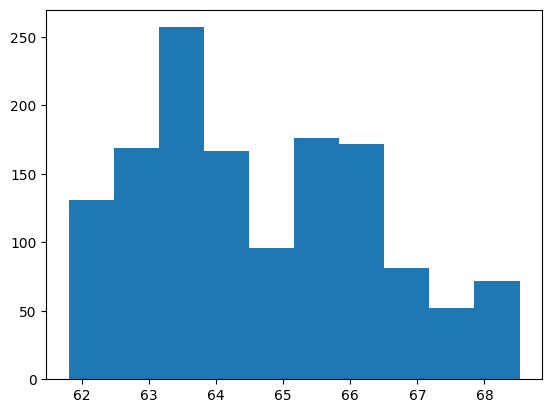

In [10]:
plt.hist(df2["Water Temperature (F)"])
plt.show()

#Box plots
Box plots can be used to check if there are outliers in the data set and can also be used to check for normality.

DataFrame.boxplot(column=, grid=True, ...) can be used to generate boxplots for selected columns. use column= to specify the columns you would like to use to create boxplots and use grid=Fasle to not display grids (by default it is True). <br>
More information about dataframe.boxplot() can be seen at:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html




Generate Boxplot for water temperature in year 2016.

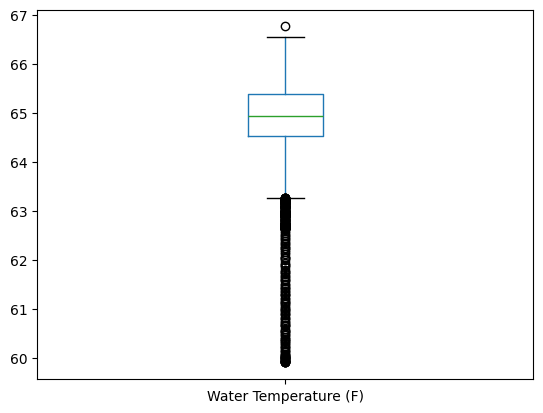

In [11]:
boxplot1 = df1.boxplot(column=["Water Temperature (F)"], grid=False)

Generate the boxplot for the water temperature in year 2017.

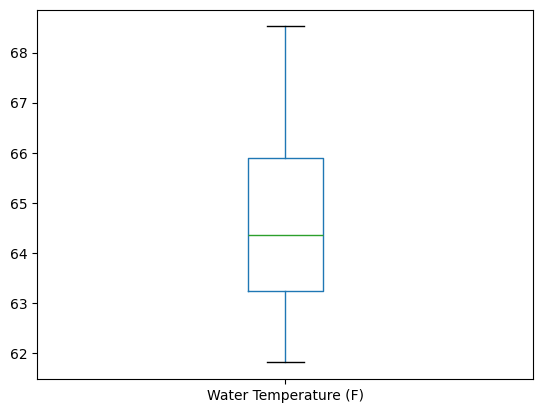

In [12]:
boxplot2 = df2.boxplot(column=["Water Temperature (F)"], grid=False)

##Confidence Interval
The (1-α)% confidence interval provides a range of values that you can be (1-α)% confident contains/captures the true mean of the population. Due to natural sampling variability, the sample mean (center of the CI) will vary from sample to sample.

Practically, it usually is near impossible to study the entire population. Researchers can only work on samples of the population and estimate parameters of the popultion using sample statistics.Therefore, a confidence interval is simply a way to measure how well the sample represents the population.

It is important to point out that the confidence is in the **method**, not in a particular interval. If we repeat the sampling method many times, approximately 95% of the intervals constructed would **capture** the true population mean.

Therefore, as the sample size increases, the range of interval values will be narrower, meaning that the estimationbeing more accurate compared with a smaller sample.
<br>
<br>
In this project, we can construct confidence interval based on the sample data collected.
<br>
From the histogram and bloxplot, we have already estabished that the data is not normally distributed. However, give the large sample size, using the central limit theorem, we know the sampling distribution of the mean will follow a normal distribution. The following code will generate the 95% confidence interval for the mean water temperatue for year 2016. The code will generate the upper level and lower level of the confidence interval based on the sample.

stats.norm.interval(alpha=,loc=scale=) function is used to genetate the confidence interval. alpha provides the significance level, 1-alpha is the confidence, loc is the mean and scale is the standard deviation of the sample mean.

numpy.mean() function provides the sample mean and stats.sem() computes the sandard error of the mean.

In [15]:
stats.norm.interval(
    confidence=0.95,
    loc=np.mean(df1["Water Temperature (F)"]),
    scale=stats.sem(df1["Water Temperature (F)"])
)


(np.float64(64.7532773547109), np.float64(64.81684987175221))

There is 95% chance that the interval (64.75327735471141, 64.81684987175272) will capture the true mean water temperature for year 2016.

## Hypothesis testing

The main purpose of statistics is to test a hypothesis. A hypothesis is an educated guess about the parameter of a population.
<br>
Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data.  It is a way to test the results of an experiment to see if it is meaningful by figuring out the odds that the results have happened by chance. If the results may have happened by chance, the experiment won’t be repeatable and will have little use.
<br>
A hypothesis is a statement about the value of an unknown population parameter.  
A hypothesis test consists of a test between two competing hypotheses: (1) a null hypothesis: H0 versus (2) an alternative hypothesis: Ha (also known as H1).

In general, the null hypothesis is a claim that there is “no effect” or “no difference of interest.” In many cases, the null hypothesis represents the status quo or a situation that nothing interesting is happening. On the other hand, the alternative hypothesis is the claim the experimenter or researcher wants to establish or find evidence to support. It is viewed as a “challenger” hypothesis to the null hypothesis.

A test statistic is used in a hypothesis test by taking the sample data from an experiment and compares the results to the results you would expect from the null hypothesis.

The P-value is the probability of observing a test statistic as extreme as the results actually observed, assuming the null hypothesis is true.

In hypothesis testing, there is a significance level of the test and it is denoted by the Greek letter  α. This value acts as a cutoff on the p-value, where if the  p-value is less than α, we would “reject the null hypothesis H0.” Alternatively, if the p-value is greater than or equal to α, we would “fail to reject H0.” Note the latter statement is not quite the same as saying we “accept H0.”

**6-Step Hypothesis Testing**
1. H0:  <br>
   Ha:  <br>
2. $\alpha$= <br>
3. Test Statistic <br>
  
4. p Value <br>
  
5. Decision <br>
   Reject H0 since p &lt; α or Fail to reject H0 since p &gt; α  <br>
6. Conclusion


# Hypothesis testing - Difference between two sample means
Suppose we are interested in testing if the mean water temperature from year 2016 is statisticlly different from the mean water temperature from the same period a year later.
In this case, there are two populations: one is the water temperature in 2016 and the other is the water temperature in 2017. We collected <b>two samples</b>: one from each population. An unpaired two sample t test would be the technique to use.  

In [16]:
t16=df1["Water Temperature (F)"]
t17=df2["Water Temperature (F)"]

# Independent variable
The independent variable in this experiment is group with two levels (a discrete variable). <br>
The dependent varibale is water temperature, a continuous variable.

# Hypotheses
H0: Two group means are equal <br>
Ha: Two group means are different <br>
or <br>
H0: $\mu_{16}$$=$$\mu_{17}$ <br>
Ha: $\mu_{16}$$\neq$$\mu_{17}$ <br>

# Model Assumptions


* Assumption 1: Are the two samples independent? <br>
* Assumption 2: Are the data from each of the 2 groups following a normal distribution? <br>
* Assumption 3: Do the two samples have the same variances (Homogeneity of Variance)?

# Checking the Normality of Data
There are several methods to check whether the data is normally distributed. <br>
scipy.stats.shapiro(x) function is one such funciton to perform the Shapiro-Wilk test for normality. The test statistic for Shapiro-Wilk test is W. If the p value associated with the test statistic is less than alpha, we conclude that the data does not follow a normal distribution. Othervise, the normality assumption is met.
<br>In this example, we will use the Shapiro-Wilks test. Here’s how to examine if the data follow the normal distribution in Python. The first value is the test statistic W, and the second value is the p value associated with the shapiro-Wilk test.<br>
<br>
scipy.stats.shapiro(x)<br>
Perform the Shapiro-Wilk test for normality.
<br>
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
More information about stats.shapiro(x) can be found at:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [17]:
stats.shapiro(t16)

ShapiroResult(statistic=np.float64(0.8105820104050241), pvalue=np.float64(9.632306986880779e-54))

The test statistic for shapiro-Wilk test is W=0.8106, p<0.05

Given that the p value (the second number in the result) is less than 0.05, we can conclude that the data is not normally distributed. This is consistent with what we have observed from the plots.

In [18]:
stats.shapiro(t17)

ShapiroResult(statistic=np.float64(0.9602628671936034), pvalue=np.float64(6.637860162774699e-19))

Given that the p value (the second number in the result) is less than 0.05, we can conclude that the data is not normally distributed.

# Checking the Homogeneity of Variances Assumption
Remember, before carrying out a t-test in Python, we also need to make sure that the variances in the two groups are equal. Here we’ll use Levene’s test to test for homogeneity of variances (equal variances) and this can be performed with the function levene as follow:<br>
scipy.stats.levene(*samples, center='median', proportiontocut=0.05)<br>
Perform Levene test for equal variances.
<br><br>
The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.<br><br>

More information about stats.levene() can be found at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

In [19]:
stats.levene(t16,t17)

LeveneResult(statistic=np.float64(1010.9721187854994), pvalue=np.float64(6.71676967090452e-202))

The levene's test statistic W=1010.97, p<0.05 <BR>
Because the p value is less than 0.05, the homogeneity of variances assumption is not met.

## Two Sample T Test
If the model assumptions are met, a two sample t test could be performed. In python, scipy.stats.ttest_ind(a, b, equal_var=True,  alternative='two-sided', ...) can be used to perform two sample t test. <br>
By default, this is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.<br>

More information can be found:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html



In [20]:
stats.ttest_ind(t16,t17)

TtestResult(statistic=np.float64(3.403234665069896), pvalue=np.float64(0.0006712601138054849), df=np.float64(4908.0))

Since the assumptions are violated in this case, t test is not an appropriate approach. Instead, we will use a nonparametric test, Mann-Whitney U Test.



## Mann-Whitney U Test

scipy.statis.mannwhitneyu() function can be used to perform the Mann-Whitney U rank test on two independent samples.

The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of of difference in location between distributions. <br>

scipy.stats.mannwhitneyu(x, y, use_continuity=True, alternative='two-sided', axis=0, method='auto', *, nan_policy='propagate', keepdims=False)<br>
Perform the Mann-Whitney U rank test on two independent samples.
<br><br>
The Mann-Whitney U test is a nonparametric test of the null hypothesis that the distribution underlying sample x is the same as the distribution underlying sample y. It is often used as a test of difference in location between distributions.
<br><br>
Note: %3.f will disply data in three digits after the decimal.

In [21]:
stat, p = stats.mannwhitneyu(t16, t17)
print('Statistics=%.3f, p=%.3f '% (stat, p))

Statistics=2664024.000, p=0.000 


The test statistic U=2192277, p<0.05<br>

The following is the standard 6-step hypothesis testing for this problem.

# 6-Step Hypothesis Testing

1.

2.

3.

4.

5.

6.